# IPL Data Analysis

###   Importing the required Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls
import seaborn as sns
sns.set()
import warnings
warnings.filterwarnings("ignore")

### Getting the .csv files

In [2]:
ipl_filepath_deliveries = 'C://Users//vivek//Desktop//Kaggle Datasets//ipl_2//deliveries.csv'
ipl_filepath_matches = 'C://Users//vivek//Desktop//Kaggle Datasets//ipl_2//matches.csv'

deliveries_data = pd.read_csv(ipl_filepath_deliveries)
deliveries_data.head()
matches_data = pd.read_csv(ipl_filepath_matches)
matches_data.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


### Checking for the number of missing values and fixing them

In [3]:
matches_data.isnull().sum()

id                   0
season               0
city                 7
date                 0
team1                0
team2                0
toss_winner          0
toss_decision        0
result               0
dl_applied           0
winner               3
win_by_runs          0
win_by_wickets       0
player_of_match      3
venue                0
umpire1              1
umpire2              1
umpire3            636
dtype: int64

In [4]:
matches_data = matches_data.drop('umpire3', axis=1)
matches_data.isnull().sum()

id                 0
season             0
city               7
date               0
team1              0
team2              0
toss_winner        0
toss_decision      0
result             0
dl_applied         0
winner             3
win_by_runs        0
win_by_wickets     0
player_of_match    3
venue              0
umpire1            1
umpire2            1
dtype: int64

In [5]:
deliveries_data.isnull().sum()

match_id                 0
inning                   0
batting_team             0
bowling_team             0
over                     0
ball                     0
batsman                  0
non_striker              0
bowler                   0
is_super_over            0
wide_runs                0
bye_runs                 0
legbye_runs              0
noball_runs              0
penalty_runs             0
batsman_runs             0
extra_runs               0
total_runs               0
player_dismissed    143022
dismissal_kind      143022
fielder             145091
dtype: int64

In [6]:
deliveries_data = deliveries_data.drop(['player_dismissed','dismissal_kind','fielder'], axis=1)
deliveries_data.isnull().sum()

match_id         0
inning           0
batting_team     0
bowling_team     0
over             0
ball             0
batsman          0
non_striker      0
bowler           0
is_super_over    0
wide_runs        0
bye_runs         0
legbye_runs      0
noball_runs      0
penalty_runs     0
batsman_runs     0
extra_runs       0
total_runs       0
dtype: int64

### Basic Analysis

In [7]:
matches_data.columns

Index(['id', 'season', 'city', 'date', 'team1', 'team2', 'toss_winner',
       'toss_decision', 'result', 'dl_applied', 'winner', 'win_by_runs',
       'win_by_wickets', 'player_of_match', 'venue', 'umpire1', 'umpire2'],
      dtype='object')

#### Replacing team names with abbrevations 

In [8]:
matches_data.replace(['Mumbai Indians','Kolkata Knight Riders','Royal Challengers Bangalore','Deccan Chargers','Chennai Super Kings', 'Rajasthan Royals','Delhi Daredevils','Gujarat Lions','Kings XI Punjab', 'Sunrisers Hyderabad','Rising Pune Supergiants','Kochi Tuskers Kerala','Pune Warriors','Rising Pune Supergiant'] ,['MI','KKR','RCB','DC','CSK','RR','DD','GL','KXIP','SRH','RPS','KTK','PW','RPS'],inplace=True)

deliveries_data.replace(['Mumbai Indians','Kolkata Knight Riders','Royal Challengers Bangalore','Deccan Chargers','Chennai Super Kings', 'Rajasthan Royals','Delhi Daredevils','Gujarat Lions','Kings XI Punjab', 'Sunrisers Hyderabad','Rising Pune Supergiants','Kochi Tuskers Kerala','Pune Warriors','Rising Pune Supergiant'] ,['MI','KKR','RCB','DC','CSK','RR','DD','GL','KXIP','SRH','RPS','KTK','PW','RPS'],inplace=True)

In [9]:
print('Number of matches played so far : ', matches_data.shape[0])

Number of matches played so far :  636


In [10]:
print('Number of Seasons so far : ', len(matches_data['season'].unique()))

Number of Seasons so far :  10


#### Number of Matches played each season

Text(0, 0.5, 'Number of Matches Played')

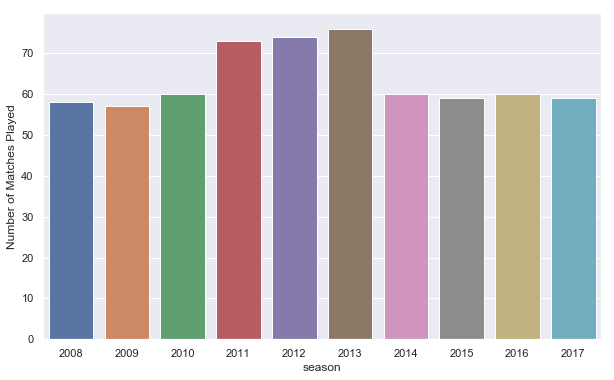

In [11]:
plt.figure(figsize=(10,6))
sns.countplot(x=matches_data['season'], data=matches_data)
plt.ylabel('Number of Matches Played')

#### Number of Matches played at different Venues

In [12]:
temp = matches_data.sort_values('venue', ascending=False)
temp['venue'].value_counts().head(10)

matches_data['venue'].value_counts()

M Chinnaswamy Stadium                                   66
Eden Gardens                                            61
Feroz Shah Kotla                                        60
Wankhede Stadium                                        57
Rajiv Gandhi International Stadium, Uppal               49
MA Chidambaram Stadium, Chepauk                         48
Punjab Cricket Association Stadium, Mohali              35
Sawai Mansingh Stadium                                  33
Subrata Roy Sahara Stadium                              17
Dr DY Patil Sports Academy                              17
Kingsmead                                               15
Maharashtra Cricket Association Stadium                 15
SuperSport Park                                         12
Sardar Patel Stadium, Motera                            12
Punjab Cricket Association IS Bindra Stadium, Mohali    11
Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket Stadium     11
Brabourne Stadium                                       

Text(0, 0.5, 'Number of Matches Played')

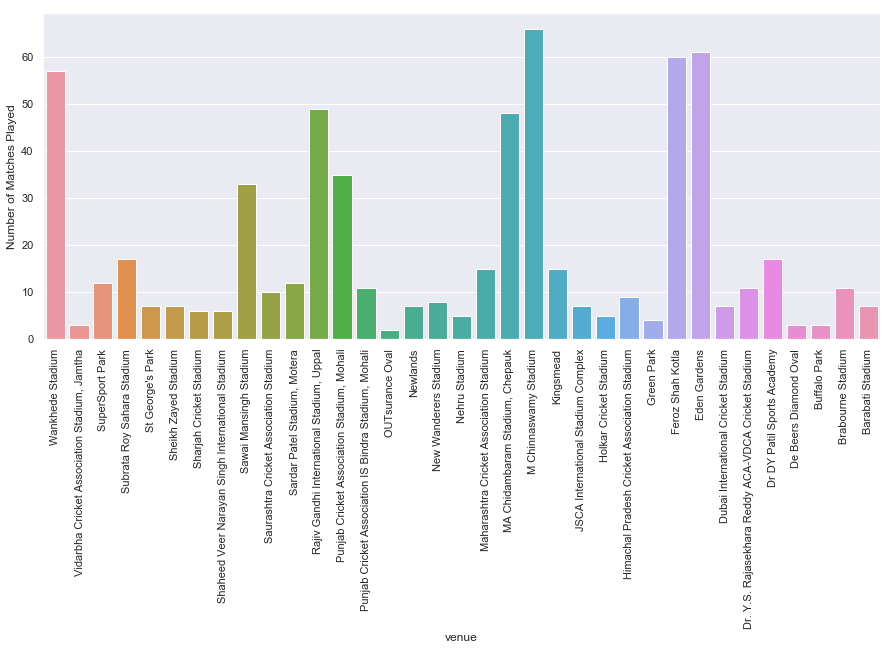

In [13]:
plt.figure(figsize=(15,6))
sns.countplot(x=temp['venue'], data=temp)
plt.xticks(rotation = 'vertical')
plt.ylabel('Number of Matches Played')

#### Number of wins for each team

In [14]:
temp = matches_data['winner'].value_counts()
print('Most number of Player of Match Awards: ')
print(temp)

Most number of Player of Match Awards: 
MI      92
CSK     79
KKR     77
RCB     73
KXIP    70
RR      63
DD      62
SRH     42
DC      29
RPS     15
GL      13
PW      12
KTK      6
Name: winner, dtype: int64


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12]),
 <a list of 13 Text xticklabel objects>)

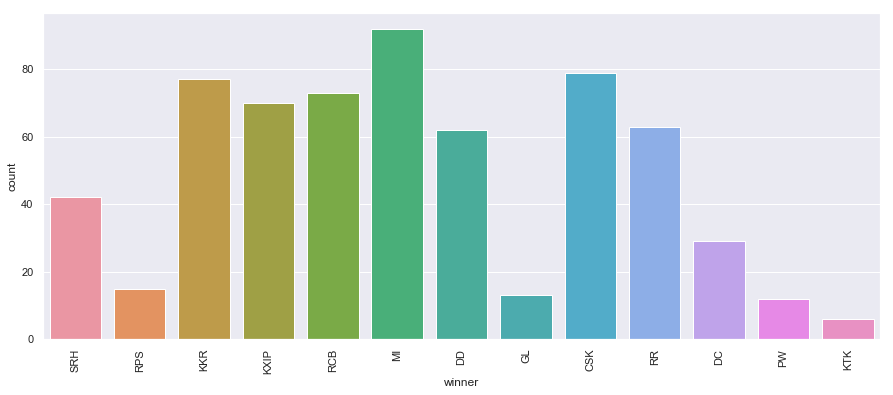

In [15]:
plt.figure(figsize=(15,6))
sns.countplot(x=matches_data['winner'], data=matches_data)
plt.xticks(rotation = 'vertical')

#### Countplot showing the number of toss wins for each team

In [16]:
matches_data['toss_winner'].value_counts()[:10]

MI      85
KKR     78
DD      72
RCB     70
KXIP    68
CSK     66
RR      63
DC      43
SRH     35
PW      20
Name: toss_winner, dtype: int64

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12]),
 <a list of 13 Text xticklabel objects>)

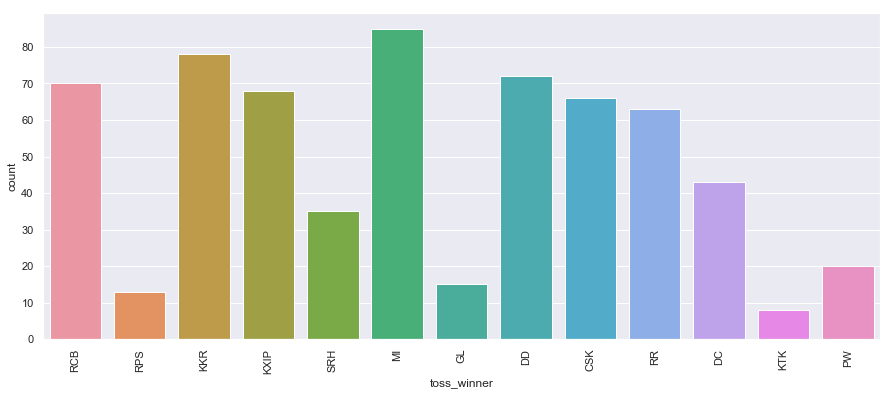

In [17]:
plt.figure(figsize=(15,6))
sns.countplot(x=matches_data['toss_winner'], data=matches_data)
plt.xticks(rotation = 'vertical')


#### Countplot showing the toss decisions taken

In [18]:
matches_data['toss_decision'].value_counts()

field    363
bat      273
Name: toss_decision, dtype: int64

(array([0, 1]), <a list of 2 Text xticklabel objects>)

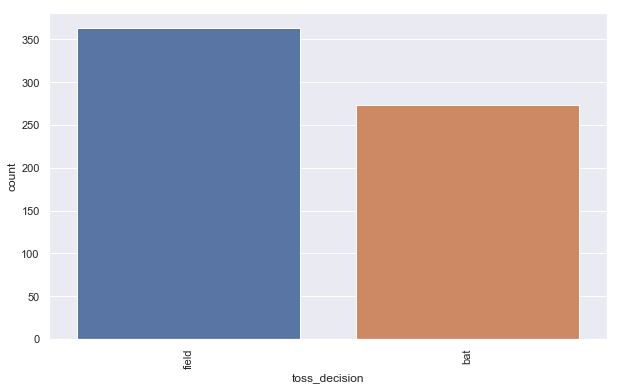

In [19]:
plt.figure(figsize=(10,6))
sns.countplot(x=matches_data['toss_decision'], data=matches_data)
plt.xticks(rotation = 'vertical')


#### Number of Matches played at different cities

In [20]:
temp = matches_data['city'].value_counts()
print('Matches played at each city:')
print(temp.head(10))

Matches played at each city:
Mumbai        85
Bangalore     66
Kolkata       61
Delhi         60
Hyderabad     49
Chennai       48
Chandigarh    46
Jaipur        33
Pune          32
Durban        15
Name: city, dtype: int64


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]),
 <a list of 30 Text xticklabel objects>)

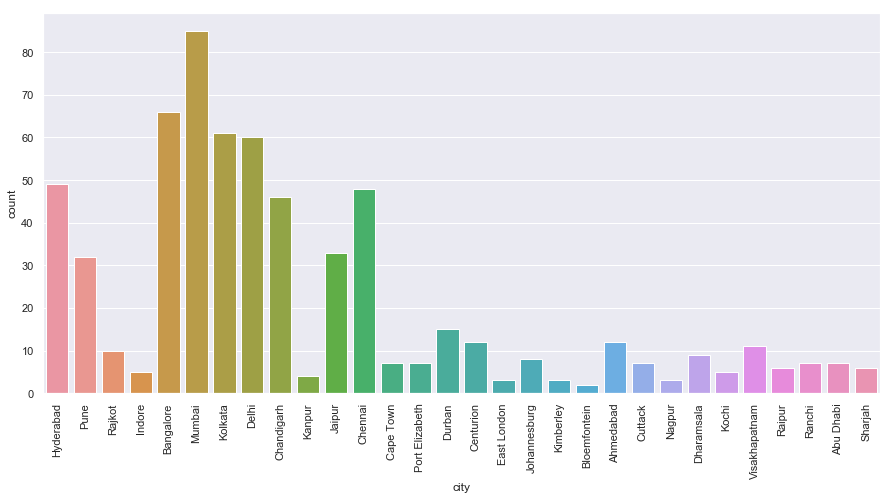

In [21]:
plt.figure(figsize=(15,7))
sns.countplot(x=matches_data['city'], data=matches_data)
plt.xticks(rotation = 'vertical')

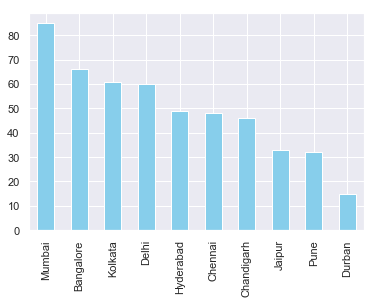

In [22]:
matches_data['city'].value_counts()[:10].plot(kind='bar', color='skyblue')

#### Number of matches played by different Umpires 

In [23]:
temp = matches_data['umpire1'].value_counts()
print('Number of matches played by different Umpires : ')
print(temp.head(10))

Number of matches played by different Umpires : 
HDPK Dharmasena    73
Asad Rauf          51
AK Chaudhary       43
Aleem Dar          38
BF Bowden          37
S Ravi             36
BR Doctrove        34
M Erasmus          32
RE Koertzen        20
S Asnani           19
Name: umpire1, dtype: int64


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43]),
 <a list of 44 Text xticklabel objects>)

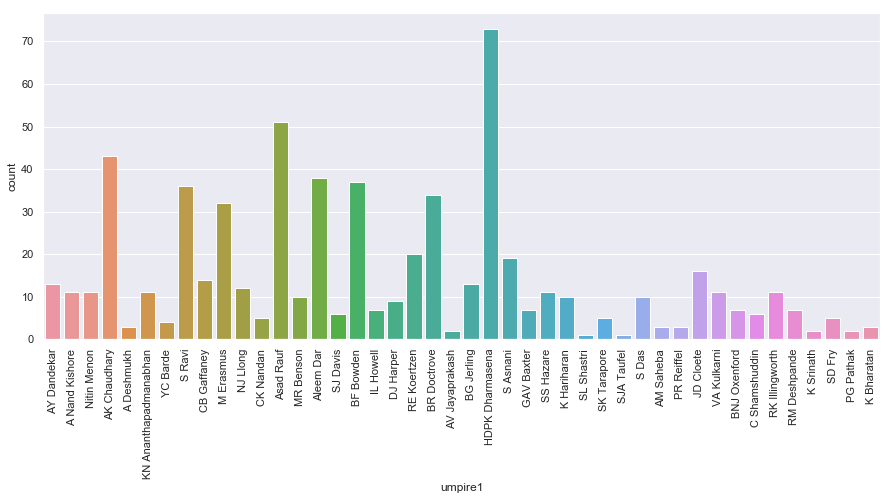

In [24]:
plt.figure(figsize=(15,6))
sns.countplot(x=matches_data['umpire1'], data=matches_data)
plt.xticks(rotation='vertical')

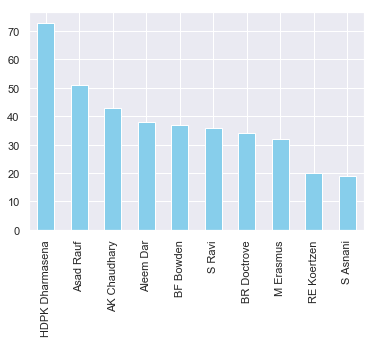

In [25]:
matches_data['umpire1'].value_counts()[:10].plot(kind='bar', color='skyblue')

#### Most number of Player of Match Awards

In [26]:
temp = matches_data['player_of_match'].value_counts().head(10)
print('Most number of Player of Match Awards: ')
print(temp)

Most number of Player of Match Awards: 
CH Gayle          18
YK Pathan         16
AB de Villiers    15
DA Warner         15
RG Sharma         14
SK Raina          14
MS Dhoni          13
G Gambhir         13
MEK Hussey        12
AM Rahane         12
Name: player_of_match, dtype: int64


Text(0.5, 1.0, 'Player of Match')

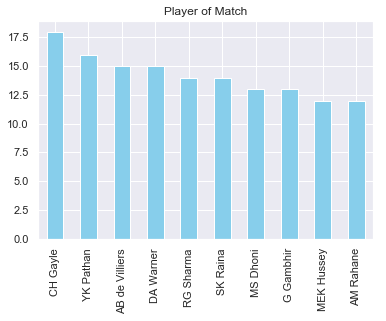

In [27]:
matches_data['player_of_match'].value_counts()[:10].plot(kind='bar',color='skyblue')
plt.title('Player of Match')

#### Wins by Most number of Wickets

In [28]:
temp = matches_data.sort_values(['win_by_wickets','date'], ascending=False)
temp = temp[['season','date','team1','team2','winner','win_by_wickets','player_of_match']].head(10)
temp

,season,date,team1,team2,winner,win_by_wickets,player_of_match
34,2017,2017-04-30,DD,KXIP,KXIP,10,Sandeep Sharma
2,2017,2017-04-07,GL,KKR,KKR,10,CA Lynn
590,2016,2016-04-21,GL,SRH,SRH,10,B Kumar
542,2015,2015-04-26,DD,RCB,RCB,10,VR Aaron
390,2013,2013-04-10,KXIP,CSK,CSK,10,MEK Hussey
376,2012,2012-05-20,RR,MI,MI,10,DR Smith
298,2011,2011-05-20,MI,RR,RR,10,SR Watson
183,2010,2010-03-18,RR,RCB,RCB,10,JH Kallis
119,2009,2009-04-19,KXIP,DD,DD,10,DL Vettori
71,2008,2008-04-27,MI,DC,DC,10,AC Gilchrist


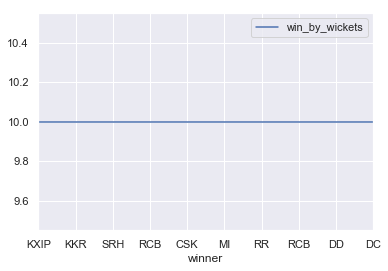

In [29]:
temp.plot(x='winner', y='win_by_wickets')

#### Wins by most number of Runs

In [30]:
temp = matches_data.sort_values('win_by_runs', ascending=False)
temp = temp[['season','date','team1','team2','winner','win_by_runs','player_of_match']].head(10)
temp

,season,date,team1,team2,winner,win_by_runs,player_of_match
43,2017,2017-05-06,MI,DD,MI,146,LMP Simmons
619,2016,2016-05-14,RCB,GL,RCB,144,AB de Villiers
59,2008,2008-04-18,KKR,RCB,KKR,140,BB McCullum
556,2015,2015-05-06,RCB,KXIP,RCB,138,CH Gayle
410,2013,2013-04-23,RCB,PW,RCB,130,CH Gayle
295,2011,2011-05-17,KXIP,RCB,KXIP,111,AC Gilchrist
114,2008,2008-05-30,RR,DD,RR,105,SR Watson
182,2010,2010-03-17,MI,DD,MI,98,SR Tendulkar
8,2017,2017-04-11,DD,RPS,DD,97,SV Samson
541,2015,2015-04-25,CSK,KXIP,CSK,97,BB McCullum


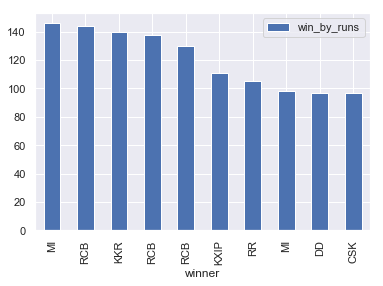

In [31]:
temp.plot(kind='bar', x='winner', y='win_by_runs')

In [32]:
temp.columns

Index(['season', 'date', 'team1', 'team2', 'winner', 'win_by_runs',
       'player_of_match'],
      dtype='object')

#### Season Winners

In [33]:
temp = matches_data.sort_values('season', ascending=False)


In [34]:
temp = matches_data.drop_duplicates(subset=['season'], keep='last')[['season', 'winner']].reset_index(drop=True)
temp

,season,winner
0,2017,MI
1,2008,RR
2,2009,DC
3,2010,CSK
4,2011,CSK
5,2012,KKR
6,2013,MI
7,2014,KKR
8,2015,MI
9,2016,SRH


#### Toss Decisions 

In [35]:
print("Toss Decisions : \n",((matches_data['toss_decision']).value_counts()/matches_data.shape[0]*100))

Toss Decisions : 
 field    57.075472
bat      42.924528
Name: toss_decision, dtype: float64


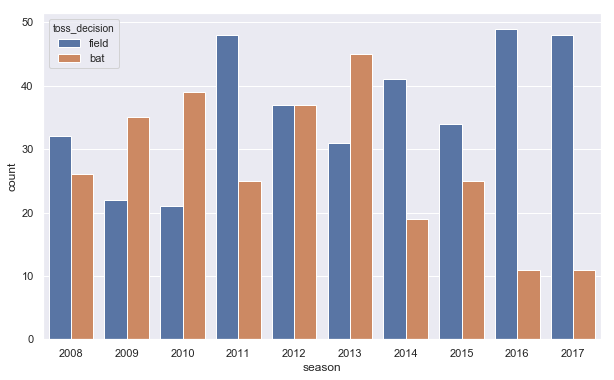

In [36]:
plt.subplots(figsize=(10,6))
sns.countplot(x='season',hue='toss_decision',data=matches_data)
plt.show()

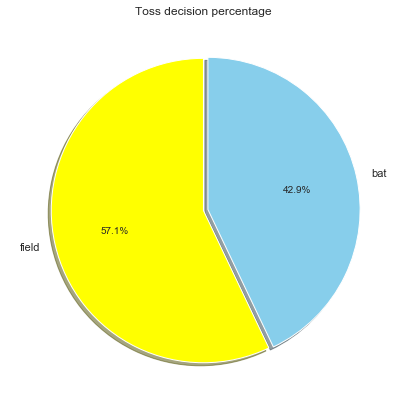

In [37]:
plt.figure(figsize=(12,7))
temp = matches_data.toss_decision.value_counts()
sizes = (np.array((temp / temp.sum())*100))
plt.pie(sizes, labels=(np.array(temp.index)),colors=['yellow', 'skyblue'],
        autopct='%1.1f%%',shadow=True, startangle=90,explode=(0,0.03))
plt.title("Toss decision percentage")
plt.show()
          

#### Toss Wins vs Match Wins

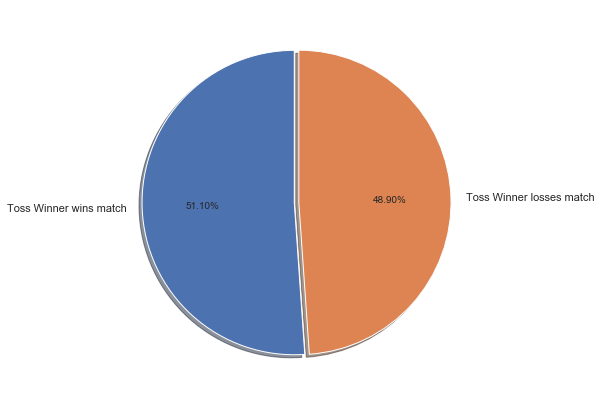

In [38]:
plt.figure(figsize=(12,7))
temp = matches_data[matches_data['toss_winner']==matches_data['winner']]
slice = [len(temp),(matches_data.shape[0]-len(temp))]
labels = ['Toss Winner wins match', 'Toss Winner losses match']
plt.pie(slice, labels=labels,autopct='%1.2f%%',startangle=90,shadow=True,explode=(0,0.03))
plt.show()

#### Total Matches Played with Total Wins

In [39]:
matches_played_byteams=pd.concat([matches_data['team1'],matches_data['team2']])
matches_played_byteams=matches_played_byteams.value_counts().reset_index()
matches_played_byteams.columns=['Team','Total Matches']
matches_played_byteams['wins']=matches_data['winner'].value_counts().reset_index()['winner']
matches_played_byteams.set_index('Team',inplace=True)

trace1 = go.Bar(
    x=matches_played_byteams.index,
    y=matches_played_byteams['Total Matches'],
    name='Total Matches',
)
trace2 = go.Bar(
    x=matches_played_byteams.index,
    y=matches_played_byteams['wins'],
    name='Matches Won'
)

data = [trace1, trace2]
layout = go.Layout(
    barmode='stack'
)

fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename='stacked-bar')


#### How many times each team wins match after winning the toss

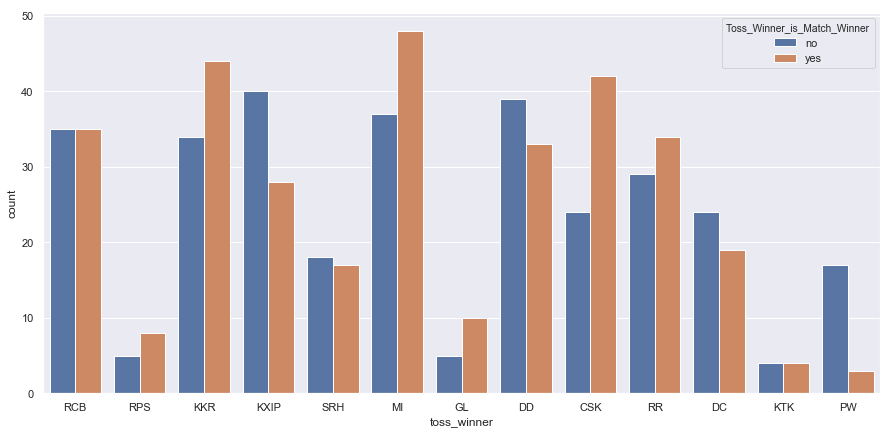

In [40]:
temp1 = matches_data
temp1['Toss_Winner_is_Match_Winner'] = 'no'
temp1['Toss_Winner_is_Match_Winner'].ix[matches_data['toss_winner']==matches_data['winner']] = 'yes'
plt.figure(figsize=(15,7))
sns.countplot(x='toss_winner', hue='Toss_Winner_is_Match_Winner', data=temp1)
plt.show()

In [41]:
deliveries_data.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs
0,1,1,SRH,RCB,1,1,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0
1,1,1,SRH,RCB,1,2,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0
2,1,1,SRH,RCB,1,3,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,4,0,4
3,1,1,SRH,RCB,1,4,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0
4,1,1,SRH,RCB,1,5,DA Warner,S Dhawan,TS Mills,0,2,0,0,0,0,0,2,2


#### Highest Scorer around the seasons

In [42]:
temp = deliveries_data.groupby('batsman')['batsman_runs'].sum().reset_index()
temp = temp.sort_values('batsman_runs', ascending=False)[:10]
temp.reset_index(drop=True)    # reset_index(drop=True) will reset the index column 

,batsman,batsman_runs
0,SK Raina,4548
1,V Kohli,4423
2,RG Sharma,4207
3,G Gambhir,4132
4,DA Warner,4014
5,RV Uthappa,3778
6,CH Gayle,3651
7,S Dhawan,3561
8,MS Dhoni,3560
9,AB de Villiers,3486


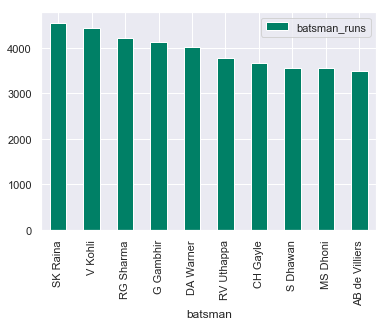

In [43]:
temp.plot(kind='bar', x='batsman', y='batsman_runs', colormap='summer')

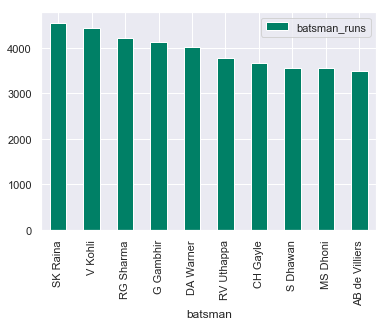

In [44]:
temp.plot(kind='bar', x='batsman', y='batsman_runs', colormap='summer', fill='o')